## Python and Jupyter Notebooks
Python is a highly versatile and widely-used programming language, renowned for its readability and broad library support. Jupyter Notebooks, on the other hand, is an interactive computing environment that enables users to create and share documents containing live code, equations, visualizations, and narrative text. Together, they form a powerful toolkit for data analysis, scientific research, and educational purposes.

We will play with Python and Jupyter Notebooks to get a feel for both.  This is a great interactive way to start development.

### Emoji Print
It is easy to add an emoji to a message in code.  However, using the emoji library or other libraries often requires you to install code on your machine.  Before using a library, that is not part of Python distribution, you must install with `pip`

```bash
# terminal command to install library
$ pip install emoji
Collecting emoji
  Downloading emoji-2.5.1.tar.gz (356 kB)
...
Successfully installed emoji-2.5.1
```

In [1]:
#!pip install emoji
from emoji import emojize 
print(emojize(":thumbs_up: Python is awesome! :grinning_face:"))

👍 Python is awesome! 😀


### Extracting Data 
Web sites become a lot more interesting when you are working with data, not trying to create it.  Here is some code using a library called newspaper, this extracts a couple of writeups from the CNN Entertainment site.
- Learn more on [newspaper3k](https://newspaper.readthedocs.io/en/latest/)
- Learn about library for [wikipedia](https://pypi.org/project/wikipedia/)

In [ ]:
#!pip install newspaper3k
from newspaper import Article
from IPython.display import display, Markdown


urls = ["http://cnn.com/2023/03/29/entertainment/the-mandalorian-episode-5-recap/index.html", 
        "https://www.cnn.com/2023/06/09/entertainment/jurassic-park-anniversary/index.html"]

for url in urls:
    article = Article(url)
    article.download()
    article.parse()
    # Jupyter Notebook Display
    # print(article.title)
    display(Markdown(article.title)) # Jupyter display only
    display(Markdown(article.text)) # Jupyter display only
    print("\n")


In [20]:
#!pip install wikipedia
import wikipedia 
from IPython.display import display, Markdown # add for Jupyter

terms = ["Python (programming language)", "JavaScript"]
for term in terms:
    # Search for a page 
    result = wikipedia.search(term)
    # Get the summary of the first result
    summary = wikipedia.summary(result[0])
    print(term) 
    # print(summary) # console display
    display(Markdown(summary)) # Jupyter display

Python (programming language)


Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.
Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.
Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000. Python 3.0, released in 2008, was a major revision not completely backward-compatible with earlier versions. Python 2.7.18, released in 2020, was the last release of Python 2.
Python consistently ranks as one of the most popular programming languages, and has gained widespread use in the machine learning community.

JavaScript


JavaScript (), often abbreviated as JS, is a programming language and core technology of the Web, alongside HTML and CSS. 99% of websites use JavaScript on the client side for webpage behavior.
Web browsers have a dedicated JavaScript engine that executes the client code. These engines are also utilized in some servers and a variety of apps. The most popular runtime system for non-browser usage is Node.js.
JavaScript is a high-level, often just-in-time compiled language that conforms to the ECMAScript standard. It has dynamic typing, prototype-based object-orientation, and first-class functions. It is multi-paradigm, supporting event-driven, functional, and imperative programming styles. It has application programming interfaces (APIs) for working with text, dates, regular expressions, standard data structures, and the Document Object Model (DOM).
The ECMAScript standard does not include any input/output (I/O), such as networking, storage, or graphics facilities. In practice, the web browser or other runtime system provides JavaScript APIs for I/O.
Although Java and JavaScript are similar in name, syntax, and respective standard libraries, the two languages are distinct and differ greatly in design.

### Inspecting a Function
The inspect module can give you the output of what's inside many Python functions/objects.  This can help you explore code behind what you are using.
- [Inspect](https://docs.python.org/3/library/inspect.html) documentation.

In [ ]:
import inspect 
from newspaper import Article

# inspect newspaper Article function
print(inspect.getsource(Article))

### Python Data Types
Dynamic typing means that the type of the variable is determined only during runtime.  Strong typing means that variables do have a type and that the type matters when performing operations.  In the illustration below there are two functions
- mean... shows types required prior to calling average function
- average, average2... calculates the average of a list of numbers


Python has types.  In the language you can use type hints, but most coders do not use them.  In other languages like Java and 'C' you must specify types.
- [Python Types Cheat Sheet](https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html)

In [23]:
import sys
from typing import Union

# Define types for mean function, trying to analyze input possibilities
Number = Union[int, float]  # Number can be either int or float type
Numbers = list[Number] # Numbers is a list of Number types
Scores = Union[Number, Numbers] # Scores can be single or multiple 

def mean(scores: Scores, method: int = 1) -> float:
    """
    Calculate the mean of a list of scores.
    
    Average and Average2 are hidden functions performing mean algorithm

    If a single score is provided in scores, it is returned as the mean.
    If a list of scores is provided, the average is calculated and returned.
    """
    
    def average(scores): 
        """Calculate the average of a list of scores using a Python for loop with rounding."""
        sum = 0
        len = 0
        for score in scores:
            if isinstance(score, Number):
                sum += score
                len += 1
            else:
                print("Bad data: " + str(score) + " in " + str(scores))
                sys.exit()
        return sum / len
    
    def average2(scores):
        """Calculate the average of a list of scores using the built-in sum() function with rounding."""
        return sum(scores) / len(scores)

    # test to see if scores is  a list of numbers
    if isinstance(scores, list):
        if method == 1:  
            # long method
            result = average(scores)
        else:
            # built in method
            result = average2(scores)
        return round(result + 0.005, 2)
    
    return scores # case where scores is a single valu

# try with one number
singleScore = 100
print("Print test data: " + str(singleScore))  # concat data for single line
print("Mean of single number: " + str(mean(singleScore)))

print()

# define a list of numbers
testScores = [90.5, 100, 85.4, 88]
print("Print test data: " + str(testScores))
print("Average score, loop method: " + str(mean(testScores)))
print("Average score, function method: " +  str(mean(testScores, 2)))

print()

badData = [100, "NaN", 90]
print("Print test data: " + str(badData))
print("Mean with bad data: " + str(mean(badData)))



Print test data: 100
Mean of single number: 100

Print test data: [90.5, 100, 85.4, 88]
Average score, loop method: 90.98
Average score, function method: 90.98

Print test data: [100, 'NaN', 90]
Bad data: NaN in [100, 'NaN', 90]


SystemExit: 

/Users/beijanmoniza/vscode/beijan25/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Hacks
Here is a summary of some of the things learned above.
- Formatting messages with emoji
- Exploring data with newspaper and wikipedia libraries
- Finding code on how the library we used was made
- Learning about data types while writing an algorithm for mean

> Part of Project Based learning is the idea of combining concepts to form something more interesting.  Make a plan, form some ideas, brainstorm ideas with pair.  Produce something that is interesting and challenging.  Samples...
- Could I get input from user to look up wikipedia information? [Python input](https://www.w3schools.com/python/ref_func_input.asp), [Article on Input](https://vegibit.com/python-input-function/)
- What could I learn in Python about Stats to get Machine Learning Read? [Stats Calculations](https://docs.python.org/3/library/statistics.html)
- Could I add emoji to an extracted article?  [String Find](https://www.w3schools.com/python/ref_string_find.asp), [String Methods](https://www.w3schools.com/python/python_strings_methods.asp)




--- Original Wikipedia Summary ---
Money is any item or verifiable record that is generally accepted as payment for goods and services and repayment of debts, such as taxes, in a particular country or socio-economic context. The primary functions which distinguish money are: medium of exchange, a unit of account, a store of value and sometimes, a standard of deferred payment.
Money was historically an emergent market phenomenon that possessed intrinsic value as a commodity; nearly all contemporary money systems are based on unbacked fiat money without use value. Its value is consequently derived by social convention, having been declared by a government or regulatory entity to be legal tender; that is, it must be accepted as a form of payment within the boundaries of the country, for "all debts, public and private", in the case of the United States dollar.
The money supply of a country comprises all currency in circulation (banknotes and coins currently issued) and, depending on the p

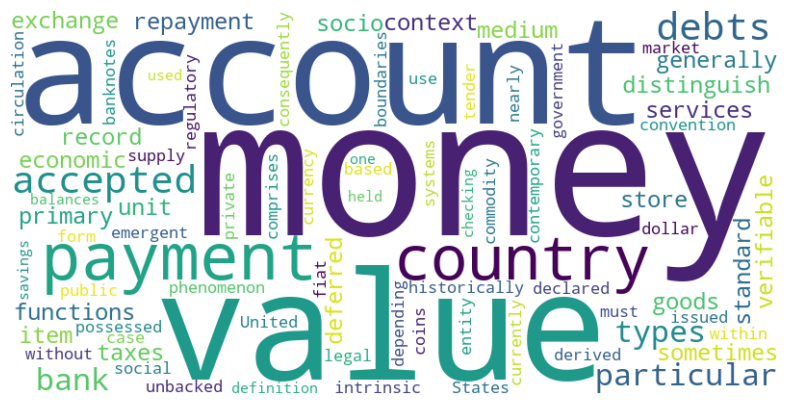


--- Enhanced Summary with Emojis ---
💰 is any item or verifiable record that is generally accepted as payment for goods and services and repayment of debts, such as taxes, in a particular country or socio-economic context. The primary functions which distinguish 💰 are: medium of exchange, a unit of account, a store of value and sometimes, a standard of deferred payment. 💰 was historically an emergent market phenomenon that possessed intrinsic value as a commodity; nearly all contemporary 💰 systems are based on unbacked fiat 💰 without use value. Its value is consequently derived by social convention, having been declared by a government or regulatory entity to be legal tender; that is, it must be accepted as a form of payment within the boundaries of the country, for "all debts, public and private", in the case of the United States dollar. The 💰 supply of a country comprises all 💵 in circulation (banknotes and coins currently issued) and, depending on the particular definition used, on

In [29]:
import wikipedia
import statistics
import emoji
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a custom list of words that should be replaced with emojis
custom_emoji_mapping = {
    "money": ":money_bag:",
    "currency": ":dollar_banknote:",
    "bank": ":bank:",
    "tax": ":receipt:",
    "gold": ":gold_bar:"
}

# Function to replace words that correspond to emoji names with their emoji
def add_emojis(text):
    words = text.split()
    emoji_summary = []
    
    for word in words:
        # Check if the word is in the custom emoji mapping
        word_lower = word.lower().strip(".,!?")
        if word_lower in custom_emoji_mapping:
            # Replace the word with the corresponding emoji
            emoji_word = emoji.emojize(custom_emoji_mapping[word_lower], language="en")
            emoji_summary.append(emoji_word)
        else:
            emoji_summary.append(word)  # No emoji, append the original word
    
    return ' '.join(emoji_summary)

# Function to calculate statistics about word lengths
def calculate_word_length_stats(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    avg_word_length = statistics.mean(word_lengths)
    return avg_word_length, len(words)

# Function to generate and display word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Get input from the user
topic = input("Enter a topic to search on Wikipedia: ")

try:
    # Look up the Wikipedia summary
    summary = wikipedia.summary(topic, sentences=5)
    print("\n--- Original Wikipedia Summary ---")
    print(summary)

    # Add emojis dynamically based on word matches
    emoji_summary = add_emojis(summary)

    # Calculate statistics about the summary
    avg_word_length, word_count = calculate_word_length_stats(summary)

    # Perform sentiment analysis on the summary
    sentiment = TextBlob(summary).sentiment

    # Generate word cloud
    generate_word_cloud(summary)

    # Present the final output
    print("\n--- Enhanced Summary with Emojis ---")
    print(emoji_summary)

    print("\n--- Statistics ---")
    print(f"Total words in summary: {word_count}")
    print(f"Average word length: {avg_word_length:.2f} characters")

    # Display sentiment analysis
    print("\n--- Sentiment Analysis ---")
    print(f"Polarity: {sentiment.polarity:.2f} (Positive/Negative)")
    print(f"Subjectivity: {sentiment.subjectivity:.2f} (Objective/Subjective)")

except wikipedia.exceptions.DisambiguationError as e:
    print(f"Error: The topic '{topic}' is too ambiguous. Please choose one of the following options: {e.options}")
except wikipedia.exceptions.PageError:
    print(f"Error: The topic '{topic}' does not match any pages on Wikipedia.")
